# Machine Learning Algorithms Comparitive Analysis

### Importing Libraries

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import keras as k
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import sklearn as sk
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [ ]:
df = pd.read_csv('/Users/hassanshahzad/Desktop/Westminster/Year3/FinalYearProject/FYP-App/Dataset/diabetes_data_upload.csv')
df.head()

In [ ]:
# Checking for null values
df.isna().sum()

In [ ]:
# Checking for data types
df.info()

# Coverting columns to lower case
df.columns = map(str.lower, df.columns)

### Data Visualization

In [ ]:
# Diabetes distribution by age
plt.figure(figsize=(8,6))
sns.histplot(df['age'],bins=30, color='royalblue', kde=True)  
plt.title('Diabetes distribution by age', fontsize=16);

In [ ]:
# Diabetes distribution by gender
plt.title('Diabetes cases by Gender', fontsize=17)
sns.countplot(x='gender', hue='class', data=df, palette=['#ff8080', '#78ebdc'])

In [ ]:
# Bar plots for symptoms and diabetes cases
count = 1
plt.figure(figsize=(15,20))
plt.suptitle('Correlation between Symptoms and Diabetes Cases'+ '\n', fontsize=20)
for i in df.columns:
    if i not in ['class', 'age', 'gender']:
        plt.subplot(5,4,count)
        plt.title(f'{i.title()}', fontweight='bold', fontsize=14)
        count +=1
        plt.tight_layout()
        total_count = df[i].value_counts()
        total_percentage = total_count / total_count.sum() * 100
        total_percentage.plot(kind="bar", color=['royalblue','lightblue'])
        plt.ylabel('Count')
        plt.title(f'{i.title()}',fontweight='bold',fontsize=12)
        for j, v in enumerate(total_percentage):
            plt.text(j, v, f"{v:.1f}%", ha='center', va='bottom', fontweight='bold')
plt.show()

### Data Preprocessing

In [ ]:
# Changing positive to 1 and negative to 0
df['class'] = df['class'].replace({'Positive': 1, 'Negative': 0})

# Seperating target feature from dataset
X = df.drop('class', axis=1)
y = df['class']

# Storing features to list
objectList = X.select_dtypes(include='object').columns.tolist()
print(objectList)

In [ ]:
# Label Encoding for object to numeric transformation
encoder = preprocessing.LabelEncoder()

for col in X.columns:
    if X[col].dtype=='object':
        X[col]=encoder.fit_transform(X[col])
    
# Printing datatypes of features    
X.info()

In [ ]:
# Printing first 5 rows of dataset
X.head()

In [ ]:
# Correlation between features and diabetes
X.corrwith(y).plot(kind='bar', grid=True, figsize=(8, 4), title="Correlation with Diabetes")

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

### Data Normalization

In [ ]:
minmax = MinMaxScaler()
X_train[['age']] = minmax.fit_transform(X_train[['age']])
X_test[['age']] = minmax.transform(X_test[['age']])
X_train.head()

### Model Building

##### Logistic Regression

In [ ]:
lg = LogisticRegression(random_state=0, penalty='l2')
lg.fit(X_train, y_train)

In [ ]:
# Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'accuracy'

acc_lg = model_selection.cross_val_score(lg, X_train, y_train, cv=kfold, scoring=score)
acc_lg.mean()

In [ ]:
# Evaluation Metrics
y_pred_lg = lg.predict(X_test)

lg_acc = accuracy_score(y_test, y_pred_lg)
lg_roc = roc_auc_score(y_test, y_pred_lg)
lg_prec = precision_score(y_test, y_pred_lg)
lg_rec = recall_score(y_test, y_pred_lg)
lg_f1 = f1_score(y_test, y_pred_lg)

results_lg = pd.DataFrame([['Logistic Regression', lg_acc, acc_lg.mean(), lg_roc, lg_prec, lg_rec, lg_f1]], columns=['Model', 'Accuracy', 'Cross Val Accuracy', 'ROC', 'Precision', 'Recall', 'F1 Score'])

results_lg

##### Decision Trees Classifier

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', random_state=0)
dt.fit(X_train, y_train)

In [ ]:
# Cross Validation
acc_dt = model_selection.cross_val_score(dt, X_train, y_train, cv = kfold, scoring = score)
acc_dt.mean()

In [ ]:
# Evaluation Metrics
y_pred_dt = dt.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred_dt)
dt_roc = roc_auc_score(y_test, y_pred_dt)
dt_prec = precision_score(y_test, y_pred_dt)
dt_rec = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

results_dt = pd.DataFrame([['Decision Trees Classifier', dt_acc, acc_dt.mean(), dt_roc, dt_prec, dt_rec, dt_f1]], columns=['Model', 'Accuracy', 'Cross Val Accuracy', 'ROC', 'Precision', 'Recall', 'F1 Score'])

results_dt

##### Random Forest Classifier

In [ ]:
estimators = 100

for i in range(1, estimators):
    rf = RandomForestClassifier(n_estimators=i, criterion='entropy', random_state=0)
    rf.fit(X_train, y_train)

In [ ]:
# Cross Validation
acc_rf = model_selection.cross_val_score(rf, X_train, y_train, cv = kfold, scoring = score)
acc_rf.mean()

In [ ]:
# Evaluation Metrics
y_pred_rf = rf.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_roc = roc_auc_score(y_test, y_pred_rf)
rf_prec = precision_score(y_test, y_pred_rf)
rf_rec = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

results_rf = pd.DataFrame([['Random Forest Classifier', rf_acc, acc_rf.mean(), rf_roc, rf_prec, rf_rec, rf_f1]], columns=['Model', 'Accuracy', 'Cross Val Accuracy', 'ROC', 'Precision', 'Recall', 'F1 Score'])

results_rf

##### Neural Networks

In [ ]:
# Function to create model, required for KerasClassifier
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap Keras model with KerasClassifier
nn = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)

nn.fit(X_train, y_train)

In [ ]:
# Cross Validation
kfold_nn = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
acc_nn = model_selection.cross_val_score(nn, X_train, y_train, cv = kfold_nn, scoring = score)

acc_nn.mean()

In [ ]:
# Evaluation Metrics
y_pred_nn = nn.predict(X_test)

nn_acc = accuracy_score(y_test, y_pred_nn)
nn_roc = roc_auc_score(y_test, y_pred_nn)
nn_prec = precision_score(y_test, y_pred_nn)
nn_rec = recall_score(y_test, y_pred_nn)
nn_f1 = f1_score(y_test, y_pred_nn)

results_nn = pd.DataFrame([['Neural Network', nn_acc, acc_nn.mean(), nn_roc, nn_prec, nn_rec, nn_f1]], columns=['Model', 'Accuracy', 'Cross Val Accuracy', 'ROC', 'Precision', 'Recall', 'F1 Score'])
results_nn

,Model,Accuracy,Cross Val Accuracy,ROC,Precision,Recall,F1 Score
0,Logistic Regression,90.384615,90.384615,90.454545,93.103448,90.000000,91.525424
1,Decision Trees Classifier,96.153846,96.153846,96.060606,96.666667,96.666667,96.666667
2,Random Forest Classifier,96.153846,96.153846,95.757576,95.161290,98.333333,96.721311
3,Neural Networks,95.192308,95.192308,95.227273,96.610169,95.000000,95.798319


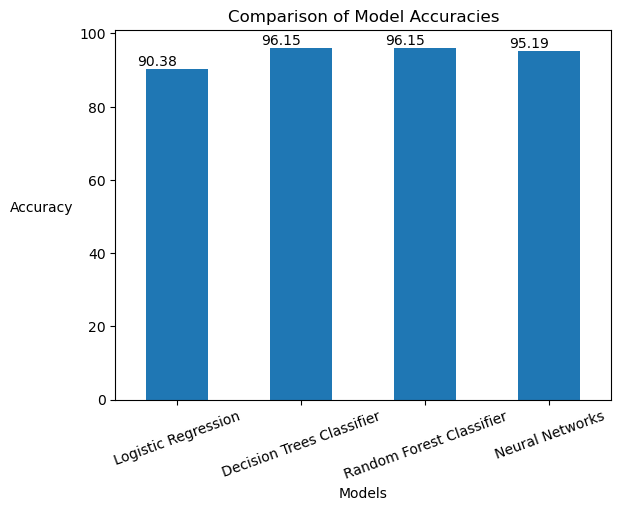

In [276]:
# Initialize a DataFrame to store the results
final_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Cross Val Accuracy', 'ROC', 'Precision', 'Recall', 'F1 Score'])

# List of models and their names
models = [lg, dt, rf, nn]
model_names = ['Logistic Regression', 'Decision Trees Classifier', 'Random Forest Classifier', 'Neural Networks']

for model, name in zip(models, model_names):
    # Predict the test set results
    y_pred = model.predict(X_test)

    # Calculate the evaluation metrics
    acc = accuracy_score(y_test, y_pred) * 100
    roc = roc_auc_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred) * 100
    rec = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    # Append the results to the DataFrame
    final_results = pd.concat([final_results, pd.DataFrame({'Model': [name], 'Accuracy': [acc], 'Cross Val Accuracy': [acc.mean()], 'ROC': [roc], 'Precision': [prec], 'Recall': [rec], 'F1 Score': [f1]})], ignore_index=True)

final_results.plot(x='Model', y='Accuracy', kind='bar', title='Comparison of Model Accuracies', xlabel='Models', rot=20)
plt.ylabel('Accuracy', rotation=0, ha='right')
plt.gca().get_legend().remove()

# Add percentage labels to the bars
for i, v in enumerate(final_results['Accuracy']):
    plt.text(i, v, f"{v:.2f}", ha='right', va='bottom')
    
# Print the final results
final_results
